In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('placement1.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


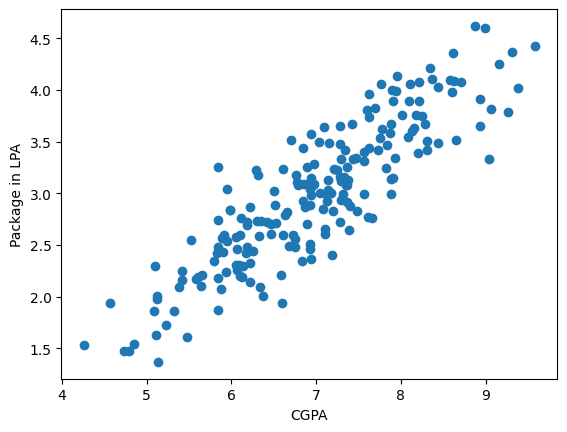

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.show()

In [10]:
X= df.iloc[:,0:1]
y= df.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=20)
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

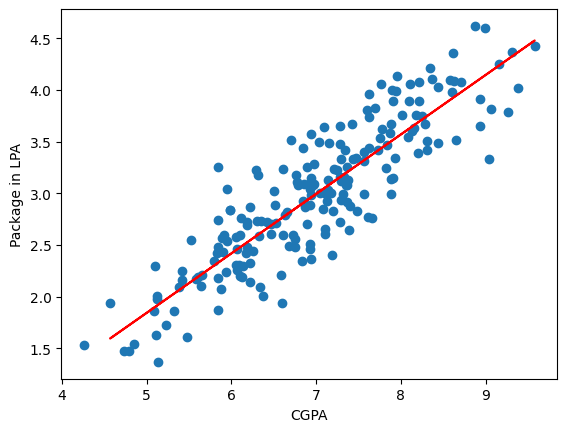

In [17]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color= 'red')
plt.xlabel('CGPA')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [22]:
y_pred= lr.predict(X_test)

In [21]:
y_test.values

array([2.73, 2.24, 2.89, 3.63, 4.06, 3.52, 3.64, 2.57, 3.26, 2.46, 2.1 ,
       4.6 , 2.44, 3.98, 1.53, 3.5 , 3.09, 3.6 , 3.02, 3.75, 3.23, 2.37,
       2.72, 2.21, 3.18, 1.54, 2.33, 2.6 , 2.99, 2.84, 3.42, 2.4 , 1.86,
       3.62, 2.72, 1.48, 3.67, 2.26, 2.77, 4.1 ])

In [23]:
print('MAE',mean_absolute_error(y_test,y_pred))  #same unit as y and good with outliers answer is 0.29 LPA Error

MAE 0.2969277139361391


In [24]:
print('MAE',mean_squared_error(y_test,y_pred)) #its square so answer is lakhs square afted by the outliers even becasue of squre term

MAE 0.14196347795247805


In [25]:
print('RMSE',np.sqrt(mean_absolute_error(y_test,y_pred))) #its in LPA not robust to outliers not affcetde by the outliers

RMSE 0.5449107394208148


In [26]:
print('R2_Score',r2_score(y_test,y_pred)) #r2_score meaure how good he line is compared to the y mean line explaing the variance 74% in th eouput

R2_Score 0.7415961128378261


In [28]:
r2=r2_score(y_test,y_pred)
r2

0.7415961128378261

In [30]:
X_test.shape

(40, 1)

In [41]:
1-((1-r2)*(X_test.shape[0]-1)/((X_test.shape[0]-1-X_test.shape[1]))) #clsoe to r2_score

0.7347960105440847

In [47]:
new_df1= df
new_df1['random_feature']= np.random.random(200)

new_df1= new_df1[['cgpa', 'random_feature', 'package']] 
new_df1

,cgpa,random_feature,package
0,6.89,0.876280,3.26
1,5.12,0.283999,1.98
2,7.82,0.681720,3.25
3,7.42,0.615865,3.67
4,6.94,0.415817,3.57
...,...,...,...
195,6.93,0.452522,2.46
196,5.89,0.909681,2.57
197,7.21,0.060017,3.24
198,7.63,0.840970,3.96


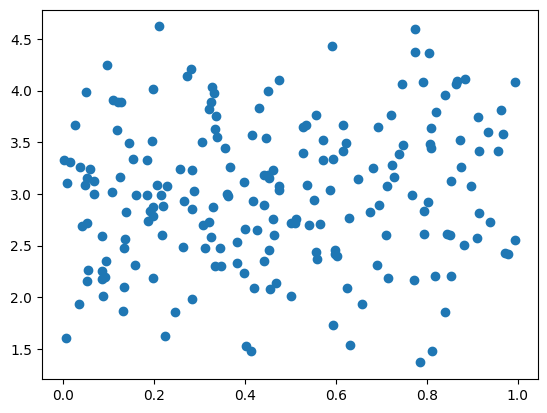

In [49]:
plt.scatter(new_df1['random_feature'], new_df1['package'])

In [60]:
X1= new_df1.iloc[:,0:2]
y1= new_df1.iloc[:,-1]

X1_train,X1_test,y1_train,y1_test= train_test_split(X1,y1,test_size=0.2,random_state=20)
lr1= LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression()

In [66]:
y1_pred= lr1.predict(X1_test)
r2_1=r2_score(y1_test,y1_pred)
r2_1   #random data made it reduce

0.7397896277061031

In [59]:
X1

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [65]:
1-((1-r2_1)*(X1_test.shape[0]-1)/((X1_test.shape[0]-1-X1_test.shape[1]))) #random data made it reduce

0.7257242021767033

In [69]:
new_df2= df.copy()
new_df2['iq']= new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2= new_df2[['cgpa', 'iq', 'package']]

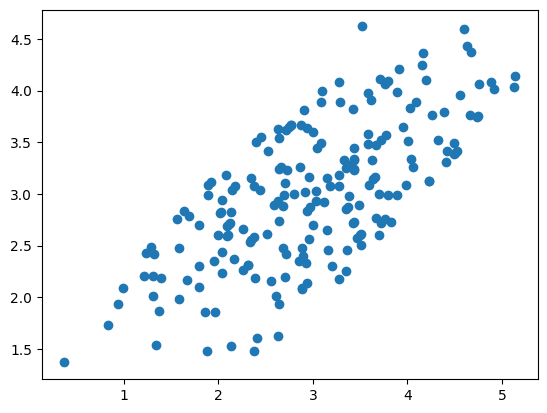

In [70]:
plt.scatter(new_df2['iq'], new_df2['package'])

In [75]:
X2= new_df2.iloc[:,0:2]
y2= new_df2.iloc[:,-1]

X2_train,X2_test,y2_train,y2_test= train_test_split(X2,y2,test_size=0.2,random_state=20)
lr2= LinearRegression()
lr2.fit(X2_train,y2_train)

LinearRegression()

In [76]:
y2_pred= lr2.predict(X2_test)
r2_2=r2_score(y2_test,y2_pred)
r2_2 #increases bcz it have efcet on the ouput columns

0.750423365194985

In [77]:
1-((1-r2_2)*(X2_test.shape[0]-1)/((X2_test.shape[0]-1-X2_test.shape[1]))) #increses sligthly because of the data but help with more data and columns are not effective in predicting the output

0.7369327362866058